In [5]:
 # UPLOADING DATA FILE

from google.colab import files

uploaded = files.upload()

Saving summer-products-with-rating-and-performance_2020-08.csv to summer-products-with-rating-and-performance_2020-08.csv


In [6]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Reading the data file into a data frame and displaying the dataset

In [7]:
df = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

display(df)

title  ... crawl_month
0     2020 Summer Vintage Flamingo Print  Pajamas Se...  ...     2020-08
1     SSHOUSE Summer Casual Sleeveless Soirée Party ...  ...     2020-08
2     2020 Nouvelle Arrivée Femmes Printemps et Été ...  ...     2020-08
3     Hot Summer Cool T-shirt pour les femmes Mode T...  ...     2020-08
4     Femmes Shorts d'été à lacets taille élastique ...  ...     2020-08
...                                                 ...  ...         ...
1568  Nouvelle Mode Femmes Bohême Pissenlit Imprimer...  ...     2020-08
1569  10 couleurs femmes shorts d'été lacent ceintur...  ...     2020-08
1570  Nouveautés Hommes Siwmwear Beach-Shorts Hommes...  ...     2020-08
1571  Mode femmes d'été sans manches robes col en V ...  ...     2020-08
1572  Pantalon de yoga pour femmes à la mode Slim Fi...  ...     2020-08

[1573 rows x 43 columns]

# Number of records and variables:

In [8]:
print(df.shape[0])
print(df.shape[1])

1573
43


# Printing data types of variables

In [9]:
df.dtypes

title                            object
title_orig                       object
price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64


# Finding number of unique values and null entries

In [10]:
for col in df.columns.values:
  list_vals = pd.unique(df[col])
  print(col + ' is of type ' + str(df[col].dtypes) + ', has ' + str(len(list_vals)) + ' unique values, and ' + str(np.sum(pd.isnull(df[col]))) + ' null entries')
  if len(list_vals)<20:
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print('  These are: '+list_str[0:len(list_str)-2])
  print('\n')

  #+' has '+str(len(pd.unique(df[col])))+' unique values : '+pd.unique(df[col]))

title is of type object, has 1201 unique values, and 0 null entries


title_orig is of type object, has 1203 unique values, and 0 null entries


price is of type float64, has 127 unique values, and 0 null entries


retail_price is of type int64, has 104 unique values, and 0 null entries


currency_buyer is of type object, has 1 unique values, and 0 null entries
  These are: EUR


units_sold is of type int64, has 15 unique values, and 0 null entries
  These are: 100, 20000, 5000, 10, 50000, 1000, 10000, 100000, 50, 1, 7, 2, 3, 8, 6


uses_ad_boosts is of type int64, has 2 unique values, and 0 null entries
  These are: 0, 1


rating is of type float64, has 192 unique values, and 0 null entries


rating_count is of type int64, has 761 unique values, and 0 null entries


rating_five_count is of type float64, has 606 unique values, and 45 null entries


rating_four_count is of type float64, has 441 unique values, and 45 null entries


rating_three_count is of type float64, has 385 unique va

# The following variables either contain single value or are of less significance to our analysis, hence can be dropped from the dataset

In [11]:
remove = ['merchant_profile_picture', 'theme', 'crawl_month', 'tags', 'currency_buyer', 'urgency_text']
df = df.drop(columns = remove)

# This variable is intended to contain binary categorical varues of 1 and 0 but is stored as 1 and na, hence correcting it

In [12]:
df['has_urgency_banner'] = df['has_urgency_banner'].fillna(0)

In [13]:
df['has_urgency_banner'] = df['has_urgency_banner'].astype(int)

# Displaying the dataset again

In [14]:
df

title  ...                product_id
0     2020 Summer Vintage Flamingo Print  Pajamas Se...  ...  5e9ae51d43d6a96e303acdb0
1     SSHOUSE Summer Casual Sleeveless Soirée Party ...  ...  58940d436a0d3d5da4e95a38
2     2020 Nouvelle Arrivée Femmes Printemps et Été ...  ...  5ea10e2c617580260d55310a
3     Hot Summer Cool T-shirt pour les femmes Mode T...  ...  5cedf17ad1d44c52c59e4aca
4     Femmes Shorts d'été à lacets taille élastique ...  ...  5ebf5819ebac372b070b0e70
...                                                 ...  ...                       ...
1568  Nouvelle Mode Femmes Bohême Pissenlit Imprimer...  ...  5d5fadc99febd9356cbc52ee
1569  10 couleurs femmes shorts d'été lacent ceintur...  ...  5eccd22b4497b86fd48f16b4
1570  Nouveautés Hommes Siwmwear Beach-Shorts Hommes...  ...  5e74be96034d613d42b52dfe
1571  Mode femmes d'été sans manches robes col en V ...  ...  5eda07ab0e295c2097c36590
1572  Pantalon de yoga pour femmes à la mode Slim Fi...  ...  5e857321f53c3d2d8f25e7ed

[1573 rows x 37 columns]

# Number of records and variables:

In [15]:
print(df.shape[0])
print(df.shape[1])

1573
37


In [16]:
for col in df.columns.values:
  list_vals = pd.unique(df[col])
  print(col + ' is of type ' + str(df[col].dtypes) + ', has ' + str(len(list_vals)) + ' unique values, and ' + str(np.sum(pd.isnull(df[col]))) + ' null entries')
  if len(list_vals) < 20:
    list_str = ''
    for n_value in range(0, len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print('  These are: '+list_str[0:len(list_str)-2])
  print('\n')

title is of type object, has 1201 unique values, and 0 null entries


title_orig is of type object, has 1203 unique values, and 0 null entries


price is of type float64, has 127 unique values, and 0 null entries


retail_price is of type int64, has 104 unique values, and 0 null entries


units_sold is of type int64, has 15 unique values, and 0 null entries
  These are: 100, 20000, 5000, 10, 50000, 1000, 10000, 100000, 50, 1, 7, 2, 3, 8, 6


uses_ad_boosts is of type int64, has 2 unique values, and 0 null entries
  These are: 0, 1


rating is of type float64, has 192 unique values, and 0 null entries


rating_count is of type int64, has 761 unique values, and 0 null entries


rating_five_count is of type float64, has 606 unique values, and 45 null entries


rating_four_count is of type float64, has 441 unique values, and 45 null entries


rating_three_count is of type float64, has 385 unique values, and 45 null entries


rating_two_count is of type float64, has 263 unique values, and 4

Pick six populous countries (population > 10 million), and for their suicide per 100,000 people over the same set of years (i.e. do not select countries with inadequate number of years), compute the point-estimates (data-driven) of their means and variances using code.

In [17]:
df['revenue'] = df.apply(lambda row: row.price*row.units_sold, axis = 1) 


In [18]:
df['discount'] = df.apply(lambda row: ((row.retail_price-row.price)/row.retail_price)*100, axis = 1)

# Segregating products based on origin country

In [19]:
for item in pd.unique(df['origin_country']):
  print(item, df[df.origin_country == item].shape[0], "\n")

CN 1516 

US 31 

nan 0 

VE 5 

AT 1 

SG 2 

GB 1 



In [20]:
countries = ['CN', 'US']

# Computing the point-estimates of the means and variances of revenues based on country of orginn

In [32]:
for item in countries:
  my1 = df[df['origin_country'] == item]
  my2 = my1['revenue']
  print(item)
  print("Mean of revenue is ", np.mean(my2))
  print("Variance of revenue is ", np.var(my2))
  print("Std Dev of revenue is ", np.std(my2), "\n")

CN
Mean of revenue is  35696.08881926121
Variance of revenue is  5353216965.926078
Std Dev of revenue is  73165.68161321315 

US
Mean of revenue is  13949.09677419355
Variance of revenue is  667053715.7648283
Std Dev of revenue is  25827.383060713455 



# Plotting Q-Q plots for these countries to check if the revenues are Gaussian distributed

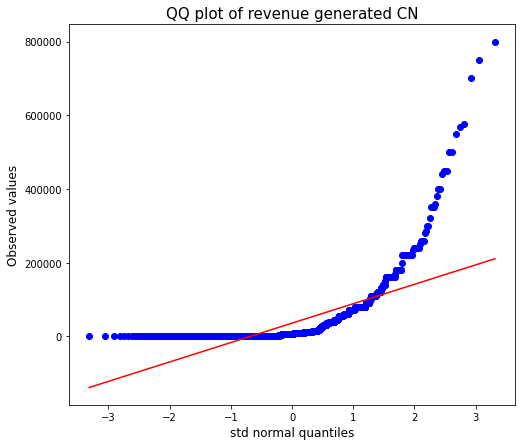

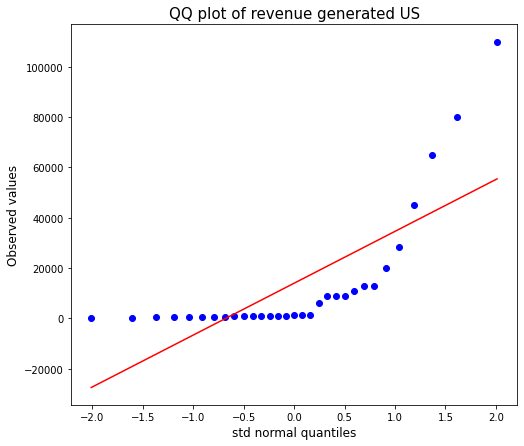

In [57]:
for item in countries:
  my3 = df[df['origin_country'] == item]
  my4 = my3['revenue']
  arr1 = np.array(my4)
  plt.figure(figsize=(8,7))
  stats.probplot(arr1, dist="norm", plot=plt)
  plt.title(str("QQ plot of revenue generated " + item ), fontsize=15)
  plt.xlabel('std normal quantiles', fontsize=12)
  plt.ylabel('Observed values', fontsize=12)
  plt.show()
  print("\n")

# Comparing the log-likelihoods of the data for each country of origin

In [24]:
import random
my5 = df[df['origin_country'] == 'CN']
my5 = my5.reset_index()
a_list = list(range(0, 1516))
b_list = random.sample(a_list, 31)
for x in b_list:
  a_list.remove(x)
dropdata = my5.drop(index=a_list)
my6 = dropdata['revenue']
my21 = dropdata['discount']
my24 = dropdata['rating']
my_list = my6.tolist()
dis_list=my21.tolist()
rat_list = my24.tolist()

In [25]:
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*np.pi*var)**.5
    num = np.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

MLL1 = 0
my7 = df[df['origin_country'] == 'CN']
my8 = pd.DataFrame(my_list)

for val in my8.values:
  MLL1 += np.log(normpdf(val, np.mean(my8), np.std(my8))) 
print(MLL1, "\n")

MLL2 = 0
my9 = df[df['origin_country'] == 'US']
my10 = my9['revenue']

for val in my10.values:
  MLL2 += np.log(normpdf(val, np.mean(my10), np.std(my10))) 
print(MLL2, "\n")

-366.71790597343073 

-358.92200210662094 



# Determining 95% C.I. of the revenues for each of these countries

In [34]:
for item in countries:
  my11 = df[df['origin_country'] == item]
  my12 = my11['revenue']
  print(item, stats.t.interval(0.95, len(np.array(my12))-1, loc=np.mean(np.array(my12)), scale=stats.sem(np.array(my12))))

CN (32008.892189429065, 39383.28544909335)
US (4318.9377967191285, 23579.25575166797)


# Using Welch’s t-test and Wilcoxon signed-rank test, confirming if the mean revenue of CN and US are really different from each other

### NULL HYPOTHESIS : not different from each other
### ALTERNATE HYPOTHESIS: different from each other

### yes means we can reject the null hypothesis and no means we cannot reject the null hypothesis

In [27]:
my13 = df[df['origin_country'] == 'CN']
my14 = np.array(my13['revenue'])
my17 = np.array(my_list)

my15 = df[df['origin_country'] == 'US']
my16 = np.array(my15['revenue'])


ans1 = stats.ttest_ind(my14, my16, equal_var = False)
print(ans1[0], ans1[1])
if ans1[0]>ans1[1]:
  print("YES")
else:
  print["NO"]

ans2 = stats.wilcoxon(my17, my16)
print(ans2[0], ans2[1])
if ans2[0]>ans2[1]:
  print("YES")
else:
  print("NO")

4.284042594061412 0.00011088741348344107
YES
132.0 0.038723026479358956
YES


# Repeating the previous part with an appropriate paired test : Wilcoxon rank-sum test (non-parametric)

In [28]:
ans3 = stats.ranksums(my17, my16)
print(ans3[0], ans3[1])
if ans3[0]>ans3[1]:
  print("YES")
else:
  print("NO")

1.2037180396888612 0.22869857732638244
YES


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


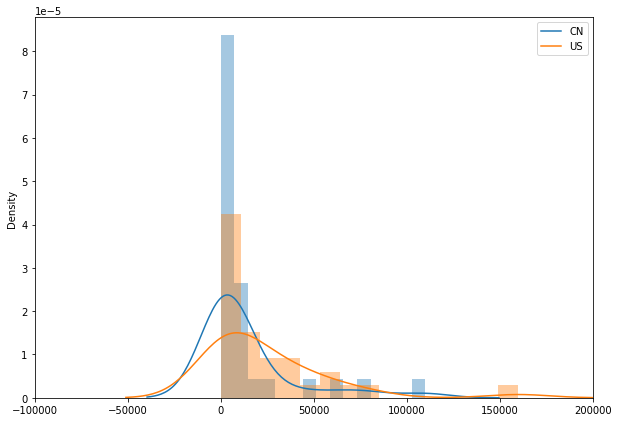

In [29]:
plt.figure(figsize=(10,7))
sb.distplot(my16, bins=15)
sb.distplot(my17, bins=15)
plt.legend(['CN','US'])
plt.xlim(-100000,200000)
plt.show()

# Correlation of revenue with discount offered (parametric)

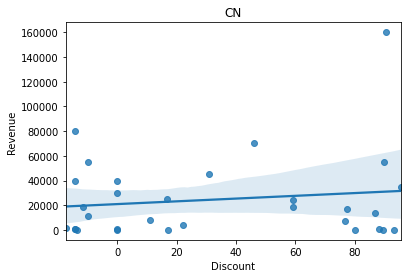



0.14203247985318035


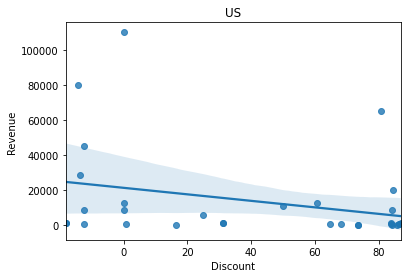



-0.29488146905640145


In [30]:
my22 = np.array(my_list)
my23 = np.array(dis_list)
sb.regplot(x=dis_list, y=my_list)
plt.title('CN', fontsize=12)
plt.xlabel('Discount')
plt.ylabel('Revenue')
plt.show()
print("\n")
ans4 = stats.pearsonr(dis_list, my_list)
print(ans4[0])

my18 = df[df['origin_country'] == 'US']
my19 = np.array(my18['revenue'])
my20 = np.array(my18['discount'])
sb.regplot(x=my20, y=my19)
plt.title('US', fontsize=12)
plt.xlabel('Discount')
plt.ylabel('Revenue')
plt.show()
print("\n")
ans5 = stats.pearsonr(my20, my19)
print(ans5[0])


# Correlation of revenue with rating of product (non-parametric)

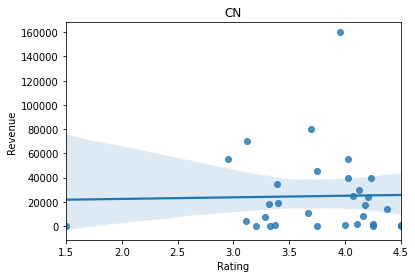



-0.08896510166909097


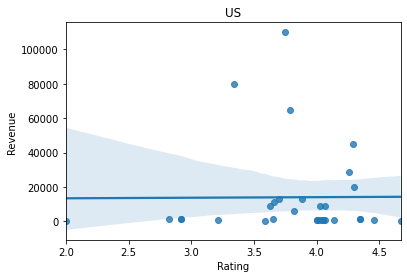



0.027875979090904945


In [31]:
my25 = np.array(my_list)
my26 = np.array(rat_list)
sb.regplot(x=rat_list, y=my_list)
plt.title('CN', fontsize=12)
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.show()
print("\n")
ans6 = stats.spearmanr(rat_list, my_list)
print(ans6[0])

my27 = df[df['origin_country'] == 'US']
my28 = np.array(my27['revenue'])
my29 = np.array(my27['rating'])
sb.regplot(x=my29, y=my28)
plt.title('US', fontsize=12)
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.show()
print("\n")
ans7 = stats.spearmanr(my29, my28)
print(ans7[0])

# Testing an appropriate hypothesis with chi-squared test.

## NULL HYPOSTHESIS: badges count for a product and the whether the product uses ad boosts are independent

In [44]:
my_frame= pd.crosstab(df['uses_ad_boosts'], df['badges_count'])
my_frame

badges_count      0   1  2  3
uses_ad_boosts               
0               812  77  2  1
1               610  61  9  1

In [53]:
my_frame.loc[0]

badges_count
0    812
1     77
2      2
3      1
Name: 0, dtype: int64

In [55]:
data = [my_frame.loc[0], my_frame.loc[1]] 
stat, p, dof, expected = stats.chi2_contingency(data) 
 
alpha = 0.05 
#95% confidence interval

print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)')

p value is 0.07772566332699807
Independent (H0 holds true)
